Importing libraries used in the project

In [1]:
#Importing libraries ised in the project
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

import seaborn as sns

# Miscellaneous libraries
import traceback
import math
import datetime


Loading the Loan data

In [2]:
# Import data from CSV file
file_path = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset/loan.csv'

try:
    loanData = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [3]:
# Import data from Excel file
file_path = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset/Data_Dictionary.xlsx'

try:
    loadDataInfo = pd.read_excel(file_path)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


To Check the number of Rows and Columns of input data. In this case:
+ ROWS: 39717
+ COLUMNS: 111

In [4]:
loanData.shape

(39717, 111)

Displaying the top 10 Rows of data to visually inspect the data.

Below are the obeservation at first glance:
+ Some columns are required to be converted into Int as currently they are String and appending with strings like "%" and "months". Example column "term", "int_rate"
+ Many columns seems to be only NaN value, need to be removed after confirmation.
+ Some of the columns are seems to have same values, which would contributing nothing in analysis and can be removed after confirmation.

In [5]:
loanData.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


******************************************************
**********************************************
Displaying the bottom 10 Rows of data to visually inspect the data.

Below are the obeservation at first glance:
+ Some columns are required to be converted into Int as currently they are String and appending with strings like "%" and "months". Example column "term", "int_rate"
+ Many columns seems to be only NaN value, need to be removed after confirmation.
+ Some of the columns are seems to have same values, which would contributing nothing in analysis and can be removed after confirmation.

In [6]:
loanData.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


***
***
As mentionsed above we would need to convert some to columns datatype

To do so we are required to have infromation of dataType of all columns

In [8]:
# Check data types of columns
data_types = loanData.dtypes
print("Data Types:")
print(data_types)


Data Types:
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


Displaying full details about dataType for reference

In [9]:

pd.DataFrame(loanData.dtypes).reset_index().style


,index,0
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


***
***
For data analysi check missing value is important as its directly affects the outcome.

From below results it looks like many columns has 100% columns values as NaN and that columns must be removed.

In [10]:

# Check for missing values
missing_values = loanData.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


************
*******
Ploting count vs data type graph

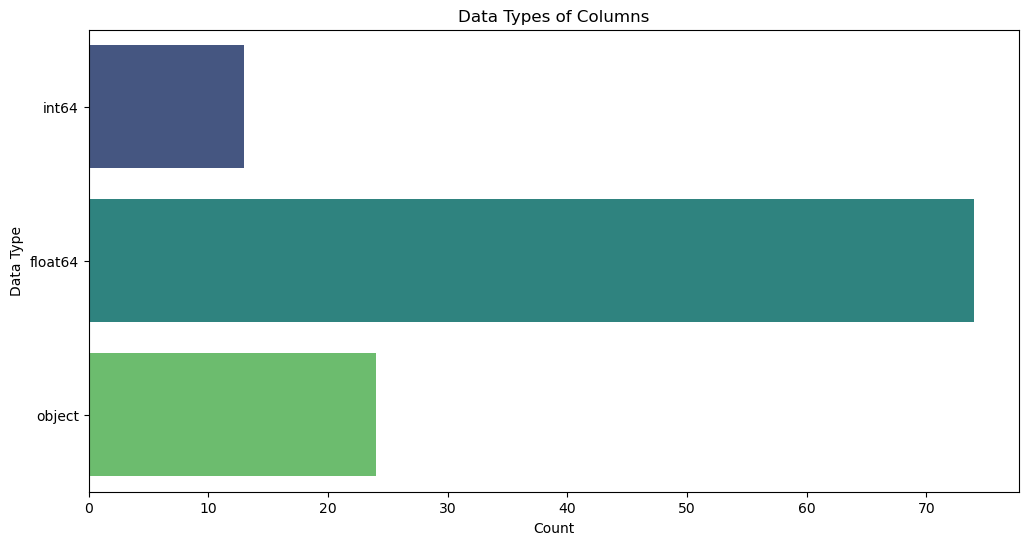

In [11]:

dtypes_df = pd.DataFrame(loanData.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'})

# Identifying numerical columns
numerical_columns = dtypes_df[dtypes_df['datatype'].isin([np.int64, np.float64])]['variable']

# Creating a bar plot using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=dtypes_df['datatype'], palette='viridis')
plt.title('Data Types of Columns')
plt.xlabel('Count')
plt.ylabel('Data Type')
plt.show()


*****
*******
Describing the data for beter understanding

In [12]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


*****
*******
Diplaying the metata of the Loan data to understand the business meaning of individual columns

In [13]:
# loadDataInfo is a DataFrame containing columns 'LoanStatNew' and 'Description'
loadDataInfo[['LoanStatNew', 'Description']].style.apply(lambda x: ['background-color: lightblue' if val == 'example_value' else '' for val in x], axis=1)


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


***
***
As number of columns present in the data is 111, which is not matching with rows given the data info. 

There for displaying missing columns

In [14]:
# Identify variables present in the data dictionary but missing in the loan dataset
columnsMissingInData = loadDataInfo[~loadDataInfo['LoanStatNew'].isin(loanData.columns)][['LoanStatNew', 'Description']]

# Display the variables that are listed in the data dictionary but missing in the 'loan' dataset
columnsMissingInData.style.set_caption("Variables present in the data dictionary but missing in the 'loan' dataset")


,LoanStatNew,Description
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
37,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
38,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
110,total_rev_hi_lim,Total revolving high credit/credit limit
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
115,nan,nan
116,nan,* Employer Title replaces Employer Name for all loans listed after 9/23/2013


******
*******
To Analyse the data it is important that we have insights about each columns.

To make the analysis consise, method is written to generate the state of all the columns at once.

Below method takes dataframe as input and results in another dataframe where all the columns converted to row and value filled with insights.

In [15]:
def get_statistics_of_data(df):
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Iterate through each column in the input DataFrame
    for i, column in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = column

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[column].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[column].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[column].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[column].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if df[column].dtype in ['int64', 'float64']:
            summary_df.loc[i, 'Mean'] = df[column].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[column].describe()['std']
            summary_df.loc[i, 'Min'] = df[column].describe()['min']
            summary_df.loc[i, '25%'] = df[column].describe()['25%']
            summary_df.loc[i, '50%'] = df[column].describe()['50%']
            summary_df.loc[i, '75%'] = df[column].describe()['75%']
            summary_df.loc[i, 'Max'] = df[column].describe()['max']
            summary_df.loc[i, 'Unique Values of numbers'] = df[column].nunique()

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif df[column].dtype == 'object':
            summary_df.loc[i, 'Unique Values of String'] = df[column].nunique()
            summary_df.loc[i, 'Top Value'] = df[column].describe()['top']
            summary_df.loc[i, 'Frequency'] = df[column].describe()['freq']

    return summary_df


In [16]:
loadDataWithStatistics = get_statistics_of_data(loanData)
loadDataWithStatistics.style

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,id,int64,0.000000,0.000000,39717.000000,683131.913060,210694.132915,54734.000000,516221.000000,665665.000000,837755.000000,1077501.000000,39717.000000,nan,nan,nan
1,member_id,int64,0.000000,0.000000,39717.000000,850463.559408,265678.307421,70699.000000,666780.000000,850812.000000,1047339.000000,1314167.000000,39717.000000,nan,nan,nan
2,loan_amnt,int64,0.000000,38832.000000,39717.000000,11219.443815,7456.670694,500.000000,5500.000000,10000.000000,15000.000000,35000.000000,885.000000,nan,nan,nan
3,funded_amnt,int64,0.000000,38676.000000,39717.000000,10947.713196,7187.238670,500.000000,5400.000000,9600.000000,15000.000000,35000.000000,1041.000000,nan,nan,nan
4,funded_amnt_inv,float64,0.000000,31512.000000,39717.000000,10397.448868,7128.450439,0.000000,5000.000000,8975.000000,14400.000000,35000.000000,8205.000000,nan,nan,nan
5,term,object,0.000000,39715.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,36 months,29096.000000
6,int_rate,object,0.000000,39346.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,371.000000,10.99%,956.000000
7,installment,float64,0.000000,24334.000000,39717.000000,324.561922,208.874874,15.690000,167.020000,280.220000,430.780000,1305.190000,15383.000000,nan,nan,nan
8,grade,object,0.000000,39710.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,7.000000,B,12020.000000
9,sub_grade,object,0.000000,39682.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,35.000000,B3,2917.000000


***
***
##                         *** DATA CLEANING ***

## Stratagy for data cleaning and for further analysis.

## About Columns
+ Drop the columns where all the values are null.
+ Drop the columns where 60% of the value are null.
+ Drop the columns where all the values are same, as there no variant to anlyse for the columns.
+ Drop the columns like primary keys, as "id" and "member_id" in this case.
+ Drop  one of the columns from pair of columns which holds the same/simlar values, like in this case "funded_amnt" and "funded_amnt_invt".
+ Drop the columns which are related to post load approval, as these column will not be available for new loan applicant.
+ Drop the columns whoese values can not be consider for analysis like in this case "desc".

## About Rows
+ Drop the rows where status of load "load_status" value is "current", as these records does not conclude the outcome.
+ Drop the rows where values are Outilier as they may impact the averall analysis.




****
***
Droping the columns where more then 60% of values are null.

In [17]:
# Calculate the percentage of null values in each column
null_percentage = (loanData.isna().sum() / loanData.shape[0]) * 100

# Set the threshold for null values to 60%
null_threshold = 60

# Identify columns with null values exceeding the threshold
cols_to_drop = null_percentage[null_percentage > null_threshold].index

# Drop the identified columns with high null values
loanData.drop(cols_to_drop, axis=1, inplace=True)


***
***
Checking the shape of the data again to see how many columns dropped.
As from below results, is can be seen that numner of columns reduces from 111 to 54

In [18]:
# Get the shape of the loan_df DataFrame
loanData.shape

(39717, 54)

****
****
Once again lets have a look on data insightes for columns where the values are same. i.e. one value is present in all the rows.

Such columns should be dropped as there are no variant to analyise.

In [19]:
loanDataInsights = get_statistics_of_data(loanData)
loanDataInsights

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,id,int64,0.0,0.0,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06,39717.0,NaN,NaN,NaN
1,member_id,int64,0.0,0.0,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06,39717.0,NaN,NaN,NaN
2,loan_amnt,int64,0.0,38832.0,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04,885.0,NaN,NaN,NaN
3,funded_amnt,int64,0.0,38676.0,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04,1041.0,NaN,NaN,NaN
4,funded_amnt_inv,float64,0.0,31512.0,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04,8205.0,NaN,NaN,NaN
5,term,object,0.0,39715.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36 months,29096.0
6,int_rate,object,0.0,39346.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10.99%,956.0
7,installment,float64,0.0,24334.0,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03,15383.0,NaN,NaN,NaN
8,grade,object,0.0,39710.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,B,12020.0
9,sub_grade,object,0.0,39682.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,B3,2917.0


***
***
Droping the columns whoese values are same across all the rows, i.e no variant

In [20]:

# Identify columns where all the value are same or no variant in data
cols_to_drop = loanDataInsights[(loanDataInsights["Unique Values of numbers"] == 1) | ((loanDataInsights["Unique Values of String"] == 1))]['Variable']

# Drop the columns
print(cols_to_drop)
loanData.drop(cols_to_drop, axis=1, inplace=True)

17                    pymnt_plan
33           initial_list_status
46    collections_12_mths_ex_med
47                   policy_code
48              application_type
49                acc_now_delinq
50      chargeoff_within_12_mths
51                   delinq_amnt
53                     tax_liens
Name: Variable, dtype: object


Lets check the size again.

As it is visible the around 9 columns are droped

In [21]:
loanData.shape

(39717, 45)

***
***
Droping the columns where values are primary key.

As per data analysis below columns looks like primary key:
+ id
+ member_id

In [22]:
loanData.drop(["id", "member_id"], axis=1, inplace=True)

***
***
Lets Check the size again.
As it is visible 2 columns are dropped

In [23]:
loanData.shape

(39717, 43)

***
***
Droping the columns which can not be considered for analysis as in this scope.

Such columns are:
+ emp_title - As this column is replacement of Employment and does not signifies much. So can be dropped.
+ url - As name suggest, this column has url for each customer and does not signifies much or might be generated post aproval
+ desc - This is desc column and analysis it is out of scope for now.
+ title - This column is a sub columns of purpose column, similar infomations are present.
+ zipCode - As the data is masked, can not be used for analysis.
+ addr_state - Out of scope as of now.


In [24]:
colums_to_remove_as_out_of_scope = ["emp_title", "url", "desc", "title", "zip_code", "addr_state"]

loanData.drop(colums_to_remove_as_out_of_scope, axis=1, inplace=True)

****
****
Lets check the size of data again.

6 more columns dropped

In [25]:
loanData.shape

(39717, 37)

***
***
Droping the columns which are generated post aproval for the loan, there for can not considered for analysis for aplicants.

Such columns are:
+ funded_amnt - Amount assigned after aproval.
+ funded_amnt_inv - Amount assigned after aproval.
+ issue_d - Date after column after loan aproval
+ out_prncp - generated post aproval.
+ out_prncp_inv - generated post approval.
+ total_pymnt - generated post approval.
+ total_pymnt_inv - generated post approval.
+ total_rec_prncp - generated post approval.
+ total_rec_int - generated post approval.
+ total_rec_late_fee - generated post approval.
+ recoveries - generated post approval.
+ collection_recovery_fee -generated post approval.
+ last_pymnt_d - generated post approval.
+ last_pymnt_amnt - generated post approval.
+ last_credit_pull_d - generated post approval.




In [26]:
post_approval_colums_to_remove = ["funded_amnt", 
"funded_amnt_inv", 
"issue_d", 
"out_prncp", 
"out_prncp_inv", 
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d"
]

loanData.drop(post_approval_colums_to_remove, axis=1, inplace=True)

Lets check the shape again.

***
***
## As this is visible now no. of columns are dropped for 111 to 22 just by going through general strategy of data cleaning


In [27]:
loanData.shape

(39717, 22)

In [28]:
loanDataInsights = get_statistics_of_data(loanData)
loanDataInsights

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,loan_amnt,int64,0.0,38832.0,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00,885.0,NaN,NaN,NaN
1,term,object,0.0,39715.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36 months,29096.0
2,int_rate,object,0.0,39346.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10.99%,956.0
3,installment,float64,0.0,24334.0,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19,15383.0,NaN,NaN,NaN
4,grade,object,0.0,39710.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,B,12020.0
5,sub_grade,object,0.0,39682.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,B3,2917.0
6,emp_length,object,1075.0,39705.0,38642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10+ years,8879.0
7,home_ownership,object,0.0,39712.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,RENT,18899.0
8,annual_inc,float64,0.0,34399.0,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00,5318.0,NaN,NaN,NaN
9,verification_status,object,0.0,39714.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Not Verified,16921.0


## TODO: Below containt is required to be modified.

Certainly, based on these information, here are observations for the variables in the data:

1. **mths_since_last_delinq:**
   - This variable represents the number of months since the borrower's last delinquency.
   - It has a high null percentage of 64.66%.
   - As it is a behavioral variable generated post-approval of the loan and not available during approval, it can be dropped from the analysis.

2. **desc:**
   - The 'desc' variable contains 32.59% null values.
   - Being a string datatype, valuable insights could be extracted using text analytics and NLP techniques.
   - However, due to the high percentage of missing values and considering the scope of this case study, it is advisable to drop this variable from the analysis.

3. **emp_title and emp_length:**
   - 'emp_title' has 6.19% and 'emp_length' has 2.71% null values.
   - These variables represent job title and employment length, respectively.
   - The missing values in these columns are relatively low and can be handled based on further analysis requirements.

4. **pub_rec_bankruptcies, last_pymnt_d, collections_12_mths_ex_med, chargeoff_within_12_mths, revol_util, tax_liens, title, and last_credit_pull_d:**
   - These variables have very low null percentages ranging from 0.18% to 0.005%.
   - The missing values in these columns are minor and can be ignored or dealt with in further analysis based on specific requirements.

Overall, for the variables with high null percentages, it's recommended to drop them from the analysis due to their limited availability or the need for advanced techniques, which are beyond the scope of this case study. For the variables with minor null percentages, handling them in further analysis can be considered based on the specific requirements.

***
***
## Cleaning the Rows

***
***
Removing the row having null values more then 5


In [29]:
rows_with_high_nulls = loanData[loanData.isna().sum(axis=1) > 5].shape[0]
rows_with_high_nulls

0

As seen above we donot have any rows with more then 5 null values 

***

***
***
Dropping all the rows where "loan_status" column have value 'Current'

Records with 'Current' loan status are excluded from the analysis as the customer is still in the process of repaying, making the outcome uncertain.

In [30]:

loanData = loanData[loanData['loan_status'] != 'Current']

# Explanation: 
# Records with 'Current' loan status are excluded from the analysis as the customer is still in the process of repaying, making the outcome uncertain.

# Reset index
loanData.reset_index(drop=True, inplace=True)

## TODO: 
+ Data conversion
    + Object to Int/float
+ Outliers removal

### FULL PAID = 1
### DEFAULTER = 0

In [31]:


# Convert 'loan_status' to integer type
loanData['loan_status'] = loanData['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
loanData['loan_status'] = loanData['loan_status'].apply(lambda x: pd.to_numeric(x))

# Explanation: 
# 'loan_status' is converted to numeric values (1 for 'Fully Paid' and 0 for Defaults) for analysis purposes.




***
***
 Display value counts for 'loan_status'

In [32]:
loanData.loan_status.value_counts()

loan_status
1    32950
0     5627
Name: count, dtype: int64

***
***
# Sectional Assessments: Summary of Individual Column Assessments
Pupose of this assesment to have deep insights about data
+ Columns datatype conversions
+ Outliers removal

In [33]:
columns_to_assess = [
        'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'
]

***
***
Method created to display more insights about data.

In [34]:
def assess_columns(loan_df, columns):
    """Perform visual, programmatic assessments, and display detailed statistics for specified columns."""
    for col in columns:
        print(f"\n{'='*50}\n{'Assessment Summary for'} '{col}'\n{'='*50}")
        
        # Visual assessment
        print(f"Visual Assessment of '{col}'".center(50, '-'))
        print(f"Head:\n{loan_df[col].head()}\n")
        print(f"Tail:\n{loan_df[col].tail()}\n")
        print(f"Sample:\n{loan_df[col].sample(5)}\n")

        # Programmatic assessment
        datatype = loan_df[col].dtype
        null_count = loan_df[col].isnull().sum()
        null_percentage = (null_count / len(loan_df) * 100)
        duplicate_count = loan_df[col].duplicated().sum()

        print(f"Programmatic Assessment of '{col}'".center(50, '-'))
        print(f"Data Type: {datatype}")
        print(f"Null Count: {null_count}")
        print(f"Null Percentage: {null_percentage:.2f}%")
        print(f"Duplicate Count: {duplicate_count}\n")

        # Counts of unique values
        unique_values = loan_df[col].value_counts()
        print(f"Counts of Unique Values for '{col}':\n{unique_values}\n")

        # Descriptive Statistics
        descriptive_stats = loan_df[col].describe().to_frame().transpose()
        print(f"Descriptive Statistics for '{col}':\n{descriptive_stats}\n")



In [35]:

assess_columns(loanData, columns_to_assess)


Assessment Summary for 'loan_amnt'
---------Visual Assessment of 'loan_amnt'---------
Head:
0     5000
1     2500
2     2400
3    10000
4     5000
Name: loan_amnt, dtype: int64

Tail:
38572    2500
38573    8500
38574    5000
38575    5000
38576    7500
Name: loan_amnt, dtype: int64

Sample:
13401    20500
29333     8800
10347    10000
24920    15000
10350     6300
Name: loan_amnt, dtype: int64

------Programmatic Assessment of 'loan_amnt'------
Data Type: int64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 37707

Counts of Unique Values for 'loan_amnt':
loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

Descriptive Statistics for 'loan_amnt':
             count         mean          std    min     25%     50%      75%  \
loan_amnt  38577.0  11047.02543  7348.441646  500.0  5300.0  9600.0  15000.0   

               max  
loan

In [36]:
'term', 'int_rate', 'emp_length', 'home_ownership', 'verification_status', 'earliest_cr_line', 'revol_util'

('term',
 'int_rate',
 'emp_length',
 'home_ownership',
 'verification_status',
 'earliest_cr_line',
 'revol_util')

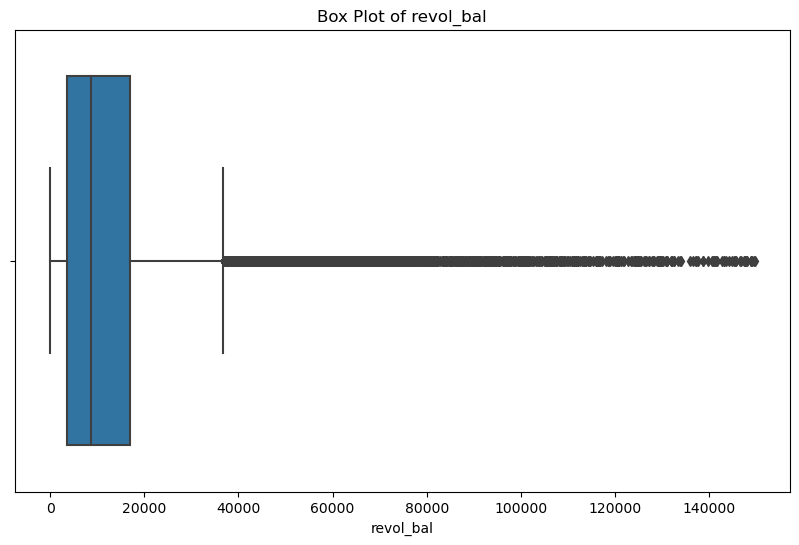

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64


In [37]:
# Plot a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=loanData['revol_bal'])
plt.title('Box Plot of revol_bal')
plt.show()

# Describe the statistical properties of the column
revol_bal_stats = loanData['revol_bal'].describe()
print(revol_bal_stats)

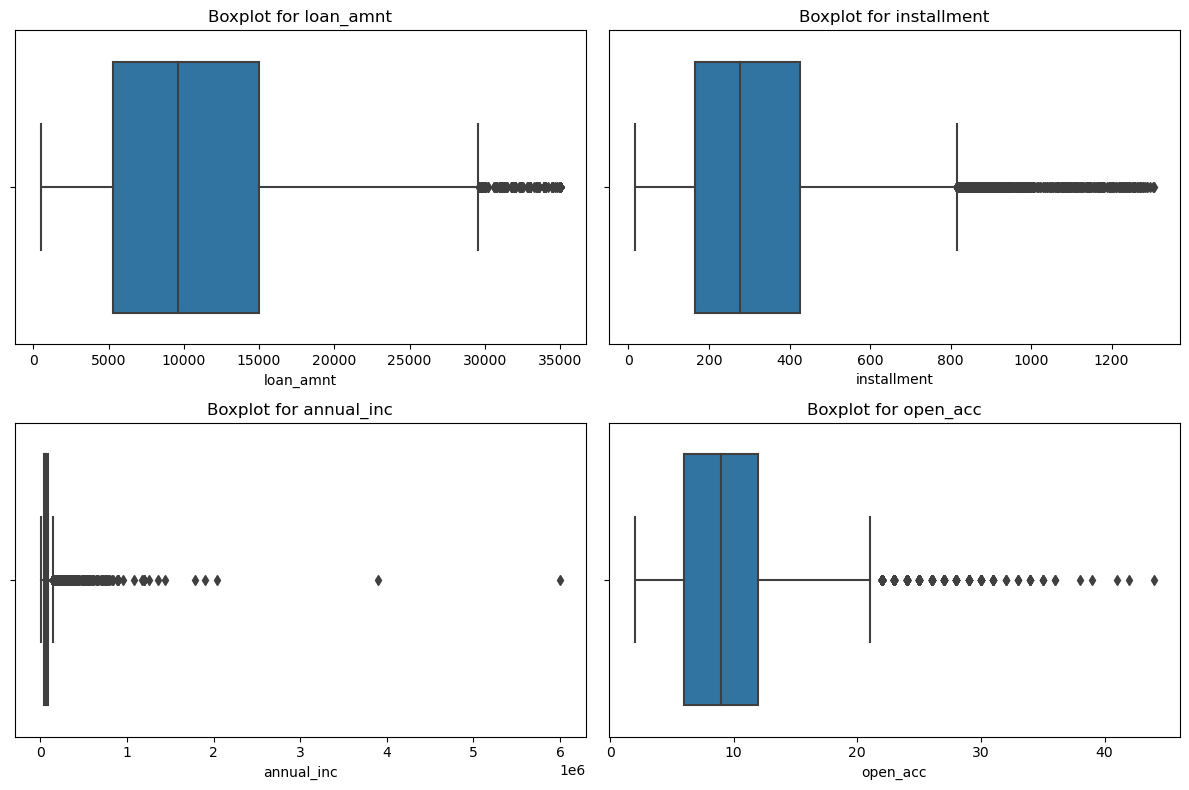

In [38]:
# Specify the columns to check for outliers
columns_to_remove_outliers = ['loan_amnt', 'installment', 'annual_inc', 'open_acc']

# Create box plots for each specified column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_remove_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=loanData[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

Handaling outliers

In [39]:
def remove_outliers_by_median(dataframe, column_name):
    """
    Remove outliers from a specific column using the median method.

    Parameters:
    - dataframe: pandas DataFrame, the input DataFrame
    - column_name: str, the name of the column for which outliers should be removed

    Returns:
    - cleaned_dataframe: pandas DataFrame, the DataFrame with outliers removed
    """
    # Calculate the median and interquartile range (IQR) for the specified column
    median_value = dataframe[column_name].median()
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier removal
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove outliers
    cleaned_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return cleaned_dataframe

columns_to_remove_outliers = ['loan_amnt', 'installment', 'annual_inc', 'open_acc', 'total_acc']

# Apply outlier removal
for column in columns_to_remove_outliers:
    loanData = remove_outliers_by_median(loanData, column)

# Print summary statistics after outlier removal
print("\nSummary Statistics AFTER Outlier Removal:")
print(loanData[columns_to_remove_outliers].describe())



Summary Statistics AFTER Outlier Removal:
          loan_amnt   installment     annual_inc      open_acc     total_acc
count  33160.000000  33160.000000   33160.000000  33160.000000  33160.000000
mean    9717.068004    283.684634   58307.558771      8.599578     20.140832
std     5844.260004    161.617188   26326.008660      3.649109      9.697021
min      500.000000     15.690000    4000.000000      2.000000      2.000000
25%     5000.000000    158.130000   39000.000000      6.000000     13.000000
50%     8500.000000    256.760000   54000.000000      8.000000     19.000000
75%    13250.000000    382.690000   74527.980000     11.000000     26.250000
max    29500.000000    768.630000  137500.000000     18.000000     48.000000


#Dont tuch this it took two days of time to fix this !

In [40]:
# Group by 'int_rate', 'loan_amnt', 'grade', 'sub_grade' and 'loan_status'
grouped_data2 = loanData.groupby(['int_rate', 'loan_amnt', 'grade', 'sub_grade', 'loan_status']).size().reset_index(name='count')


cleaning dat types

In [41]:
def clean_additional_data():
    # Clean 'term' column
    loanData['term'] = loanData['term'].apply(lambda x: np.nan if pd.isnull(x) else x.strip(' ').strip(' months'))

    # Display cleaned 'term' column
    print("\nCleaning Additional Data:\n")
    print(f"Dataset: loanData\nColumn: term\n")
    print(loanData['term'].head())

    # Clean 'grade' column
    level_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
    ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
    loanData['grade'] = loanData['grade'].astype(ordered_cat)

    # Display cleaned 'grade' column
    print("\nDataset: loanData\nColumn: grade\n")
    print(loanData['grade'].head())

    # Clean 'sub_grade' column
    level_order1 = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
    sub_grade_order = sorted(loanData['sub_grade'].unique(), reverse=True)
    sub_grade_cat = pd.api.types.CategoricalDtype(ordered=True, categories=sub_grade_order)
    loanData['sub_grade'] = loanData['sub_grade'].astype(sub_grade_cat)

    # Display cleaned 'sub_grade' column
    print("\nDataset: loanData\nColumn: sub_grade\n")
    print(loanData['sub_grade'].head())

    print("\nCleaning successful.")

# Assume loan_df is the DataFrame to be cleaned
clean_additional_data()



Cleaning Additional Data:

Dataset: loanData
Column: term

0    36
1    60
2    36
3    36
4    36
Name: term, dtype: object

Dataset: loanData
Column: grade

0    B
1    C
2    C
3    C
4    A
Name: grade, dtype: category
Categories (7, object): ['G' < 'F' < 'E' < 'D' < 'C' < 'B' < 'A']

Dataset: loanData
Column: sub_grade

0    B2
1    C4
2    C5
3    C1
4    A4
Name: sub_grade, dtype: category
Categories (35, object): ['G5' < 'G4' < 'G3' < 'G2' ... 'A4' < 'A3' < 'A2' < 'A1']

Cleaning successful.


In [42]:
loanData.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,5000,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [43]:
# Cleaning Tidiness Issues
cleaning_issues = [
    {"Dataset": "loanData", "Column": "earliest_cr_line",
     "Description": "The data is in string format. It should be converted to date format. However, since we do not have the day of the month the credit line was opened, we can either impute the day of the date to first of the respective month or extract month and year information into two individual columns of string datatype.",
     "Action": "action"},
    
    {"Dataset": "loanData", "Column": "emp_length",
     "Description": "Even though numbers values can be extracted from the data to convert it into numerical datatype, it is advised to convert the variable into ordered categorical data as the values contain some categorical data such as < 1 year and 10+ years, which cannot be efficiently converted to numeric values. Since 5 years has more significance than 4 years the datatype should be converted to ordered categorical datatype.",
     "Action": "action"},
    
    {"Dataset": "loanData", "Column": "home_ownership",
     "Description": "NONE values are detected in the categories, which could be considered as Null values. This value introduces an extra category in the home_ownership variable. As there are only 3 values/entries associated with it, the relevant rows should be dropped.",
     "Action": "No action needed."},
    
    {"Dataset": "loanData", "Column": "int_rate",
     "Description": "Data is in string format. Numerical values can be extracted to convert it to float datatype.",
     "Action": "action"},
    
    {"Dataset": "loanData", "Column": "revol_util",
     "Description": "Data is in string format. Numerical values can be extracted to convert it to float datatype.",
     "Action": "action"},
    
    {"Dataset": "loanData", "Column": "verification_status",
     "Description": "The data is in string format. It should be converted to date format. However, since we do not have the day of the month, we can either impute the day of the date to the first of the respective month or extract month and year information into two individual columns of string datatype.",
     "Action": "action"}
]

In [44]:
# Define verification_status_mapping first
verification_status_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2
}

def extract_date(row):
    '''
    Extract date from the given values
    '''
    # Check if the entry is a full date
    if isinstance(row, pd.Timestamp):
        return row
    else:
        # convert month into date format
        month_dict = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 
                      'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
        month = row.split('-')[0]
        month = month_dict.get(month)  # Use get to handle potential key errors
        # convert year into date format
        year = int(row.split('-')[1])
        current_date = str(datetime.datetime.utcnow())[:10]
        current_date_year = str(datetime.datetime.utcnow())[2:4]
        if year <= int(current_date_year):
            if len(str(year)) == 1:
                year = '0' + str(year)
            year = str(current_date[0:2]) + str(year)
        else:
            year = str(int(current_date[0:2])-1) + str(year)

        date = year + '-' + month + '-01'
        return date


def clean_tidiness_issue(issue, loanData):
    print(f"\n{'='*40}\nCleaning Tidiness Issue\n{'='*40}")
    print(f"\nDataset: {issue['Dataset']}\nColumn: {issue['Column']}\n")
    print(f"Description:\n{issue['Description']}\n")
    
    if 'action' in issue['Action'].lower():
        if issue['Column'] == 'earliest_cr_line':
            # Extract date and convert to datetime format
            loanData['earliest_cr_line'] = loanData['earliest_cr_line'].apply(extract_date)
            loanData['earliest_cr_line'] = pd.to_datetime(loanData['earliest_cr_line'])
        elif issue['Column'] == 'emp_length':
            # Strip ' years' and convert to ordered categorical datatype
            loanData['emp_length'] = loanData['emp_length'].apply(lambda x: np.nan if pd.isnull(x) else str(x).strip(' years'))
            level_order = ['< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
            ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
            loanData['emp_length'] = loanData['emp_length'].astype(ordered_cat)
        elif issue['Column'] == 'home_ownership':
            # No cleaning needed for home_ownership
            pass
        elif issue['Column'] == 'int_rate':
            # Strip '%' and convert to float64
            loanData['int_rate'] = loanData['int_rate'].apply(lambda x: np.nan if pd.isnull(x) else float(str(x).strip('%')))
        elif issue['Column'] == 'revol_util':
            # Strip '%' and convert to float64
            loanData['revol_util'] = loanData['revol_util'].apply(lambda x: np.nan if pd.isnull(x) else float(str(x).strip('%')))

        elif issue['Column'] == 'verification_status':
            # Convert 'verification_status' to integer type
            loanData['verification_status'] = loanData['verification_status'].map(verification_status_mapping)
        
        print("Cleaning successful.")
    else:
        print("No cleaning needed.")


# Cleaning Process
for issue in cleaning_issues:
    clean_tidiness_issue(issue, loanData)

print("\nCleaning Tidiness Issues - All Activities Completed.")



Cleaning Tidiness Issue

Dataset: loanData
Column: earliest_cr_line

Description:
The data is in string format. It should be converted to date format. However, since we do not have the day of the month the credit line was opened, we can either impute the day of the date to first of the respective month or extract month and year information into two individual columns of string datatype.

Cleaning successful.

Cleaning Tidiness Issue

Dataset: loanData
Column: emp_length

Description:
Even though numbers values can be extracted from the data to convert it into numerical datatype, it is advised to convert the variable into ordered categorical data as the values contain some categorical data such as < 1 year and 10+ years, which cannot be efficiently converted to numeric values. Since 5 years has more significance than 4 years the datatype should be converted to ordered categorical datatype.

Cleaning successful.

Cleaning Tidiness Issue

Dataset: loanData
Column: home_ownership

Descrip

In [45]:

loanData['pub_rec_bankruptcies'] = loanData['pub_rec_bankruptcies'].fillna(99.0)
loanData['emp_length'] = loanData['emp_length'].cat.add_categories('0').fillna('0')
loanData['emp_length'] = loanData['emp_length'].cat.reorder_categories(['0', '< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'], ordered=True)

In [49]:
# Save Cleaned Dataset

# Step 1: Create a cleaned copy of the original DataFrame
loanData_clean = loanData.copy(deep=True)

# Step 2: Save the cleaned data to a CSV file
output_folder = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset'
csv_filename = 'loan_clean.csv'
csv_path = f'{output_folder}/{csv_filename}'

loanData_clean.to_csv(csv_path, index=False)

# Step 3: (Optional) Load the cleaned dataset back into the DataFrame when necessary
# Uncomment the following line if you want to load the cleaned dataset
# loanData_clean = pd.read_csv(csv_path, delimiter=',')

# (Optional) Reassign the cleaned DataFrame back to the original DataFrame
loanData = loanData_clean.copy(deep=True)

print(f"Cleaned dataset saved to: {csv_path}")


Cleaned dataset saved to: /Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset/loan_clean.csv


In [50]:
loanData.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10+,RENT,24000.0,2,...,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,C4,< 1,RENT,30000.0,1,...,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,C5,10+,RENT,12252.0,0,...,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,C1,10+,RENT,49200.0,1,...,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
4,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,1,...,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0


In [51]:
# Select numeric columns
numeric_columns = loanData.select_dtypes(include=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = loanData[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                      loan_amnt  int_rate  installment  annual_inc  \
loan_amnt              1.000000  0.241943     0.921263    0.344480   
int_rate               0.241943  1.000000     0.220973    0.008417   
installment            0.921263  0.220973     1.000000    0.336640   
annual_inc             0.344480  0.008417     0.336640    1.000000   
verification_status    0.359791  0.176138     0.298812    0.149388   
loan_status           -0.056676 -0.210681    -0.022197    0.076765   
dti                    0.095230  0.101587     0.082367   -0.089400   
delinq_2yrs           -0.040589  0.154507    -0.028749    0.035029   
inq_last_6mths        -0.001295  0.135711    -0.002558    0.028036   
open_acc               0.171129 -0.074542     0.159102    0.258775   
pub_rec               -0.034634  0.106668    -0.029623    0.002157   
revol_bal              0.282983  0.050116     0.268313    0.370002   
revol_util             0.076148  0.477901     0.111342    0.044485   
total_acc           

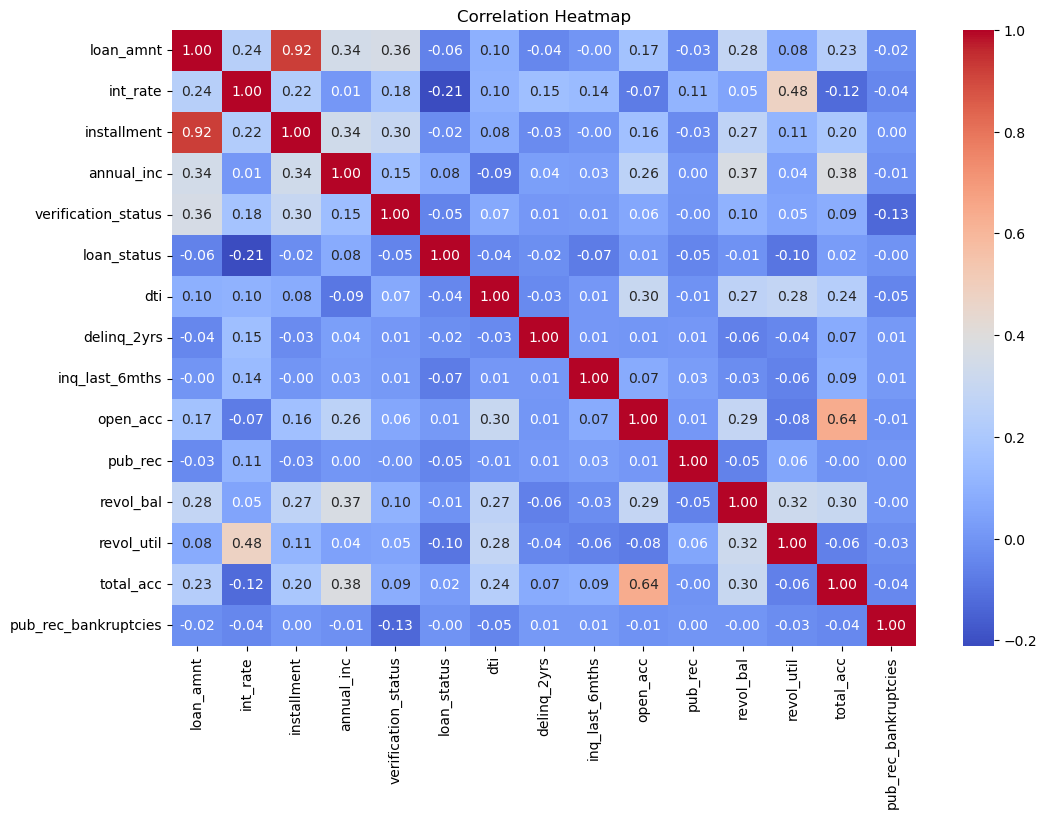

In [52]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

I can see that some of the variables have a high positive correlation with each other, such as loan_amnt and installment, or revol_bal and revol_util. This means that as one variable increases, so does the other. Some of the variables have a high negative correlation with each other, such as int_rate and annual_inc, or dti and verification_status. This means that as one variable increases, the other decreases. Some of the variables have a low or no correlation with each other, such as loan_amnt and pub_rec, or annual_inc and delinq_2yrs. This means that there is no clear relationship between them.

compare 'verification status' (Data Type: int64), 'emp_length' (values in Data Type: category), 'home_ownership' (Data Type: object), 'annual_inc' (Data Type: float64), 'dti' (Data Type: float64), 'open_acc' (Data Type: int64), 'revol_bal' (Data Type: int64), 'total_acc' (Data Type: int64).

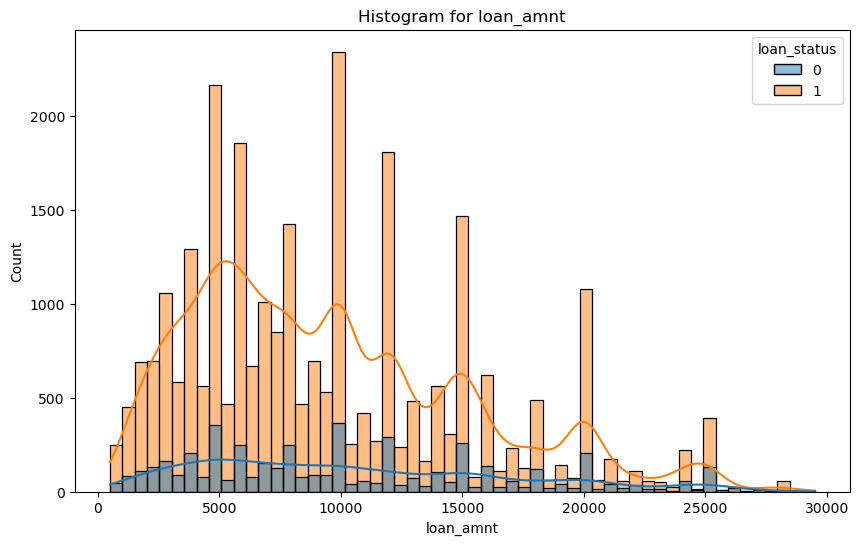

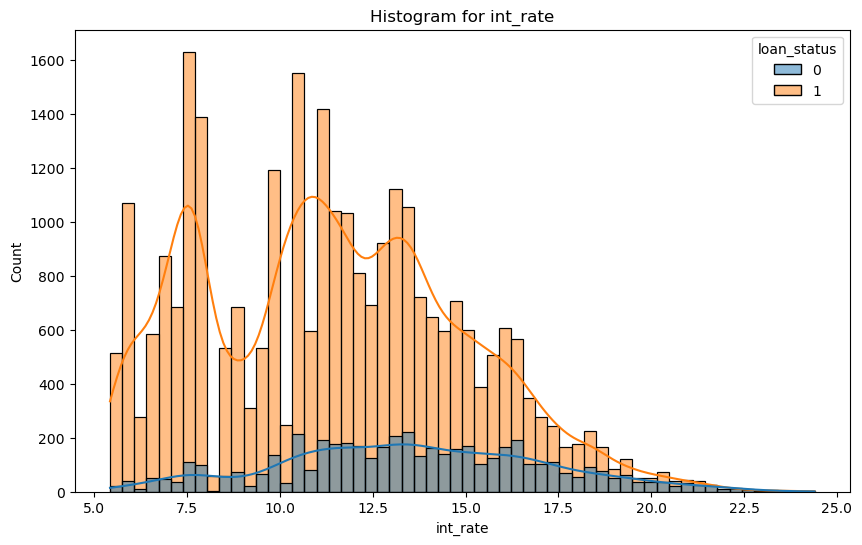

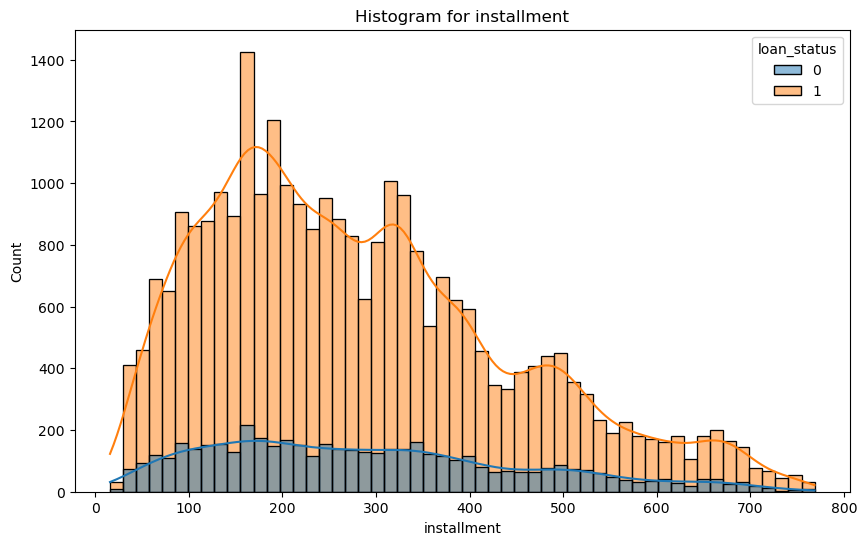

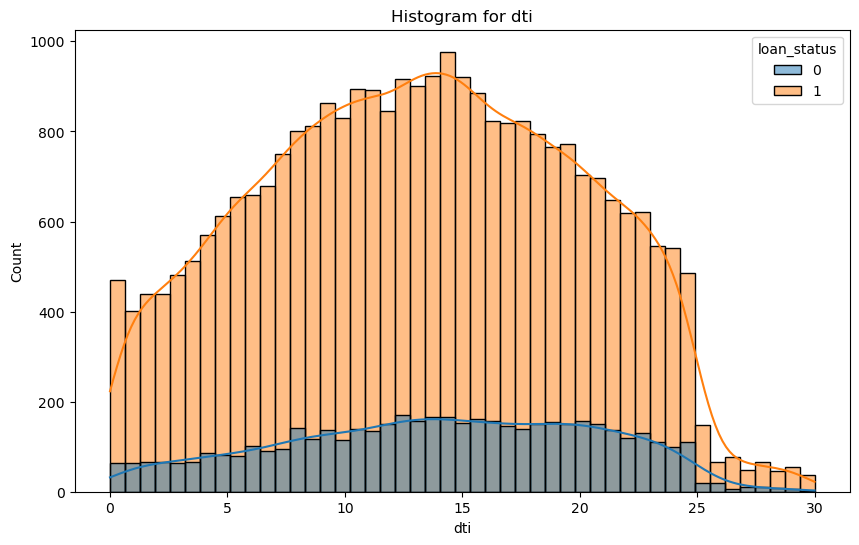

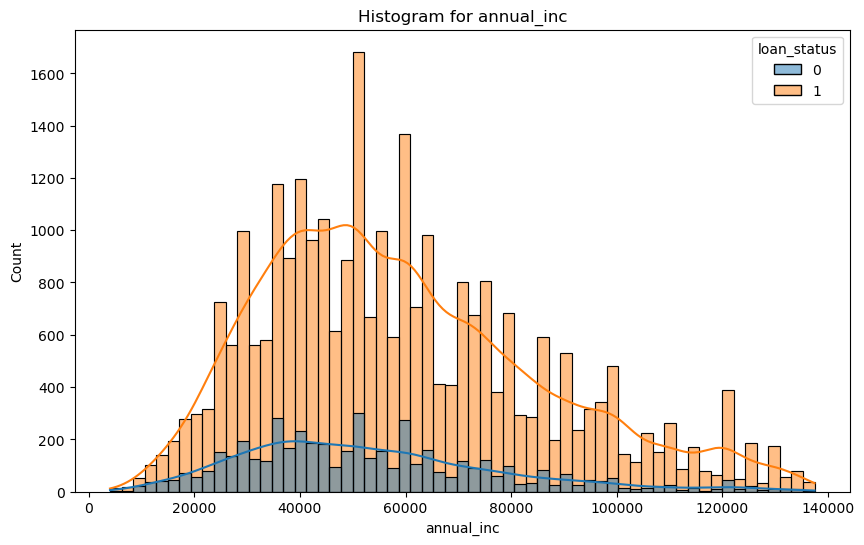

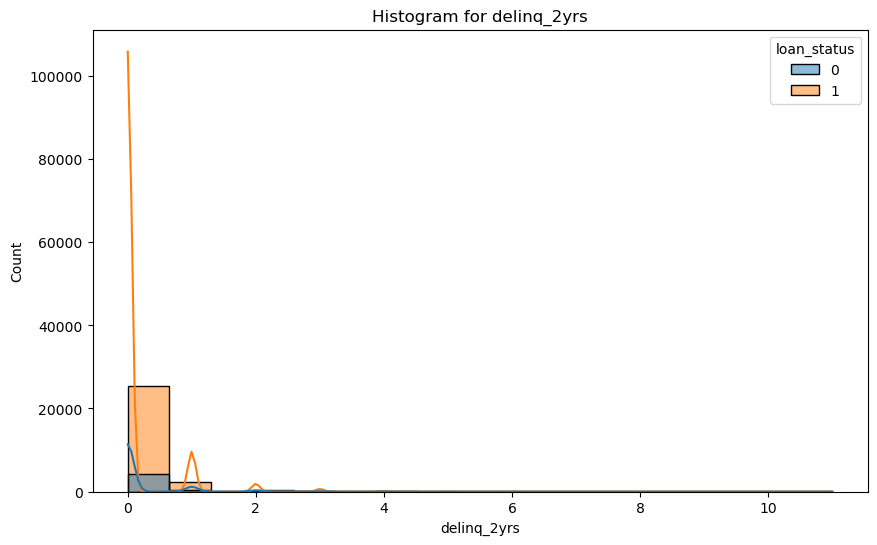

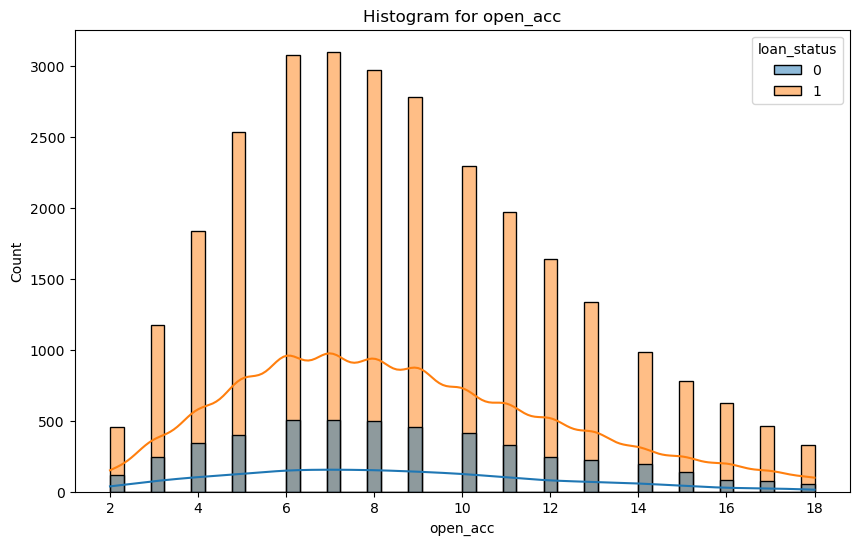

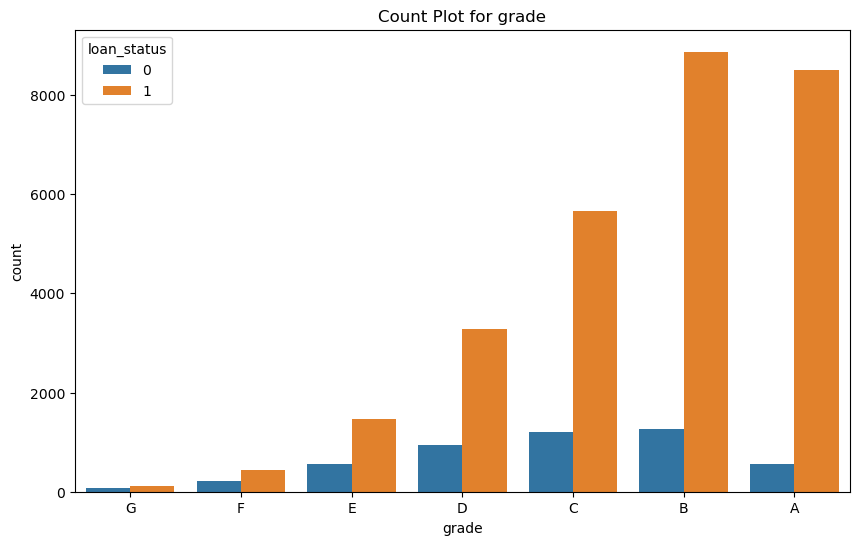

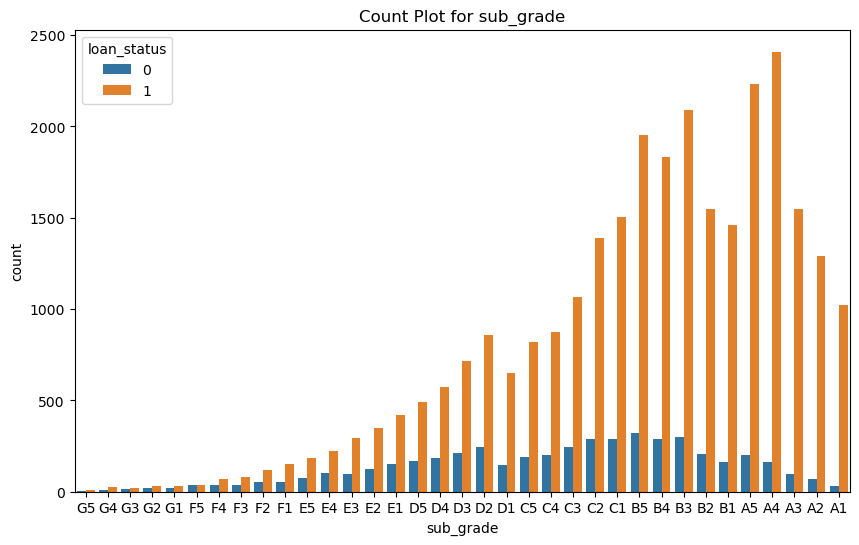

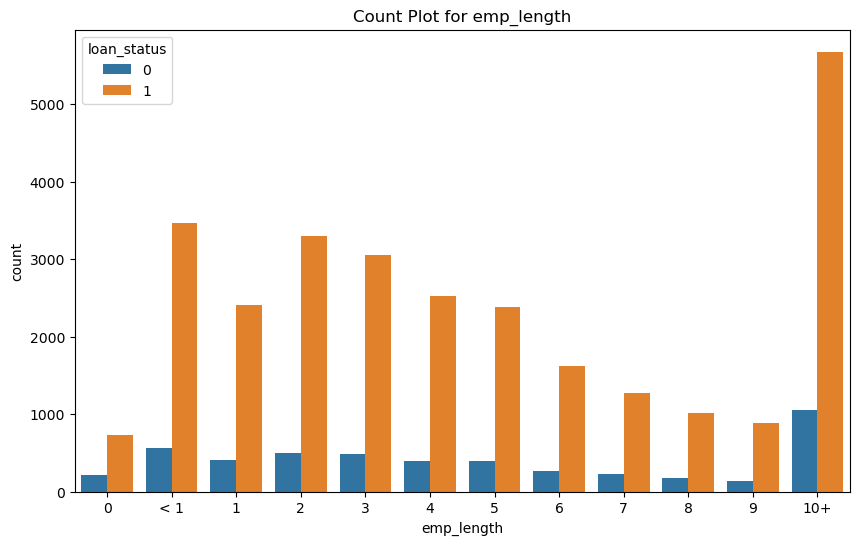

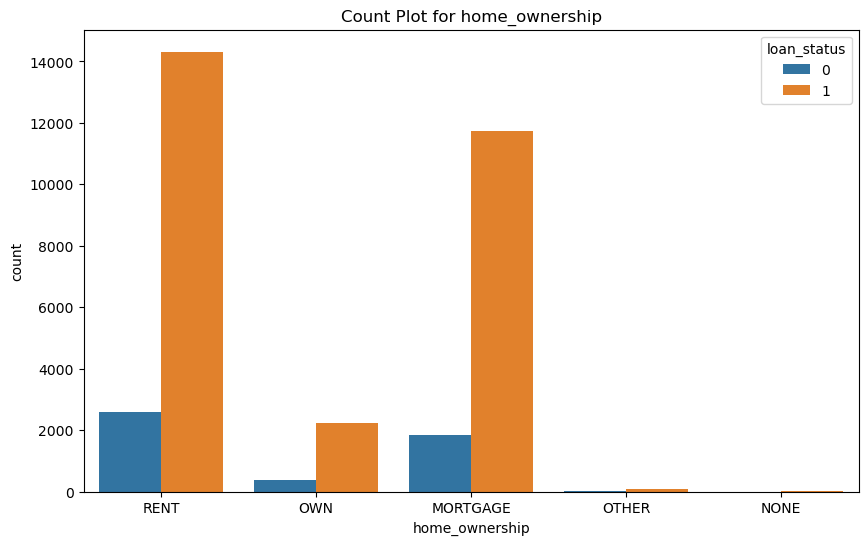

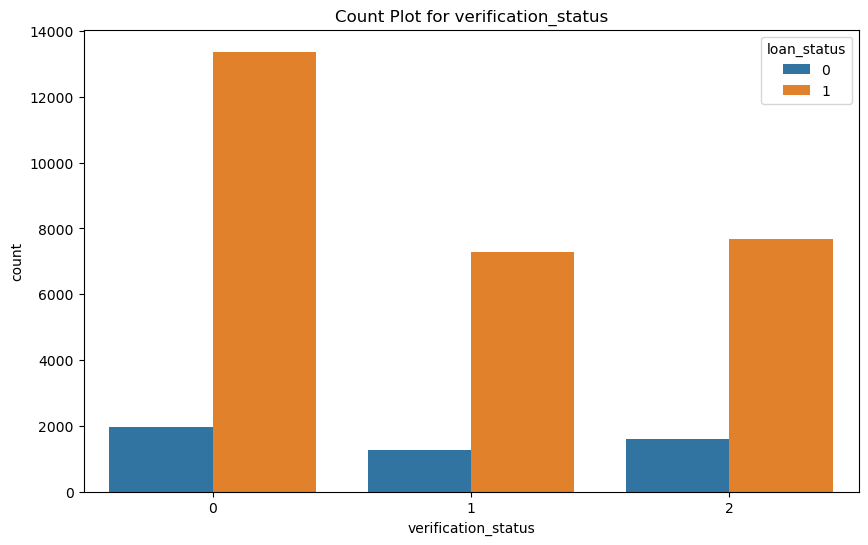

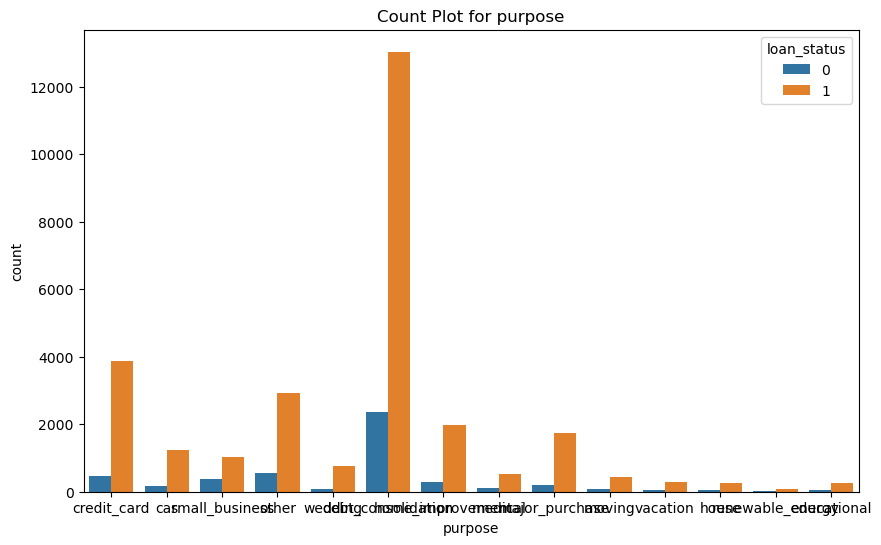

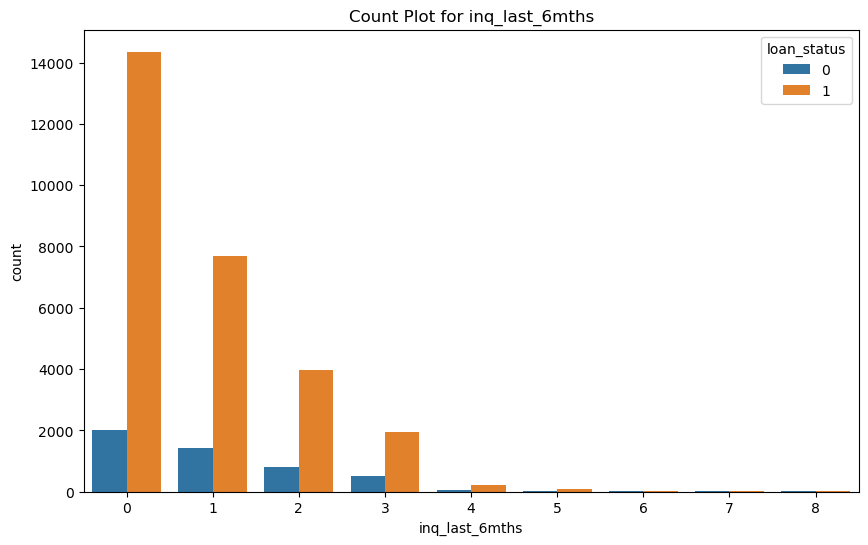

In [53]:
# Plotting histograms for continuous variables
continuous_variables = ['loan_amnt', 'int_rate', 'installment', 'dti', 'annual_inc', 'delinq_2yrs', 'open_acc']
for var in continuous_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=loanData, x=var, hue='loan_status', kde=True)
    plt.title(f'Histogram for {var}')
    plt.show()

# Plotting count plots for categorical variables
categorical_variables = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'inq_last_6mths']
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loanData, x=var, hue='loan_status')
    plt.title(f'Count Plot for {var}')
    plt.show()



The higher the interest rate, the more difficult it is for the borrower to repay the loan, and hence the higher the chance of default.

The higher the debt-to-income ratio, the more burdened the borrower is by their existing debts, and hence the higher the chance of default.

The default rate also varies across sub grades, with lower sub grades having higher default rates than higher sub grades. The highest default rate is for sub grade G5, with about 40%, while the lowest default rate is for sub grade A1, with about 5%. This means that borrowers with low credit scores are more likely to default on their loans than borrowers with high credit scores.

*The picture shows that the default rate is higher for the lower sub grades than the higher sub grades, as the orange bars are taller than the blue bars for most of the sub grades. This suggests that the lower sub grades are more likely to lead to default, as they indicate a lower creditworthiness of the borrower.
The picture also shows that the default rate is lower for the sub grades A4 and A2 than the other sub grades, as the blue bars are taller than the orange bars for these two sub grades. This suggests that the sub grades A4 and A2 are less likely to lead to default, as they indicate a higher creditworthiness of the borrower.
The picture also shows that the sub grade B3 has the highest count of loans, followed by B4 and B5. This suggests that the sub grade B is the most common sub grade in the data, and that the sub grades B3, B4, and B5 have the highest demand for loans. However, these sub grades also have a high default rate, as the orange bars are almost equal to or higher than the blue bars for these sub grades. This suggests that the sub grades B3, B4, and B5 are the most risky sub grades in the data, and that the lender should be careful when lending money to these sub grades.

The verification status indicates the level of trust that the lender has on the borrower’s income or employment. The picture shows that the default rate is higher for the borrowers who have their employment verified than the borrowers who have their employment not verified or source verified. This may seem counterintuitive, as one would expect that the verified borrowers would have a lower chance of default. However, this may also imply that the lender is more lenient or generous with the verified borrowers, and hence they may lend them more money or charge them lower interest rates, which may increase the risk of default.

The employment length indicates how long the borrower has been working at their current job. The picture shows that the default rate is higher for the borrowers who have been employed for a longer period of time than the borrowers who have been employed for a shorter period of time. This may also seem counterintuitive, as one would expect that the longer employed borrowers would have a lower chance of default. However, this may also imply that the longer employed borrowers have a higher income or a higher credit score, and hence they may qualify for larger loans or lower interest rates, which may increase the risk of default.



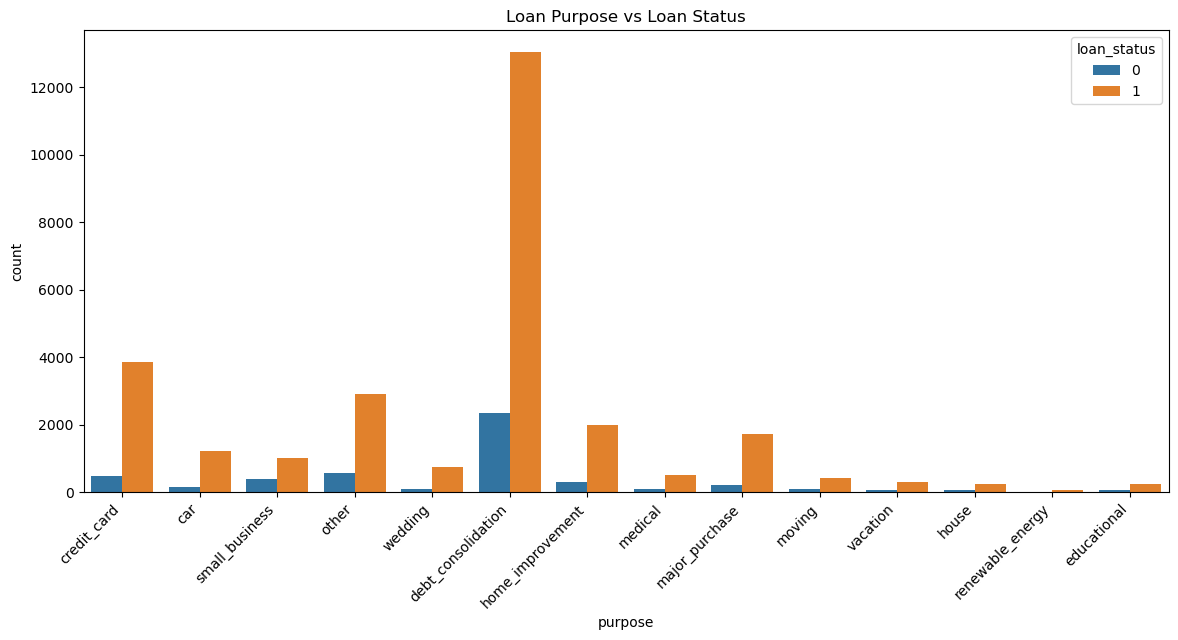

In [54]:
# Visualization of purpose vs loan_status
plt.figure(figsize=(14, 6))
sns.countplot(x='purpose', hue='loan_status', data=loanData)
plt.title('Loan Purpose vs Loan Status')
plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
# Group by 'int_rate', 'loan_amnt', 'purpose', and 'loan_status'
grouped_data = loanData.groupby(['int_rate', 'loan_amnt', 'purpose', 'loan_status']).size().reset_index(name='count')


# Analyze the grouped data
default_analysis = grouped_data.groupby(['purpose', 'loan_status']).agg({
    'count': 'sum',
    'int_rate': 'mean',
    'loan_amnt': 'mean'
}).reset_index()

# Filter for default customers (loan_status = 0)
default_customers = default_analysis[default_analysis['loan_status'] == 0]

# Display the insights
print("\nInsights for customers who are likely to default:")
print(default_customers)



Insights for customers who are likely to default:
               purpose  loan_status  count   int_rate     loan_amnt
0                  car            0    152  12.340067   7341.610738
2          credit_card            0    464  13.203295  11499.204545
4   debt_consolidation            0   2354  14.030423  11771.837894
6          educational            0     51  12.703529   6766.666667
8     home_improvement            0    287  13.053453  10103.147482
10               house            0     49  15.172245   9693.367347
12      major_purchase            0    204  12.774171   8287.311558
14             medical            0     93  13.281099   7974.175824
16              moving            0     88  12.221059   5621.470588
18               other            0    562  13.225935   7357.776718
20    renewable_energy            0     17  11.717647   7352.941176
22      small_business            0    373  14.021517  11835.112360
24            vacation            0     48  11.490417   5740.1041

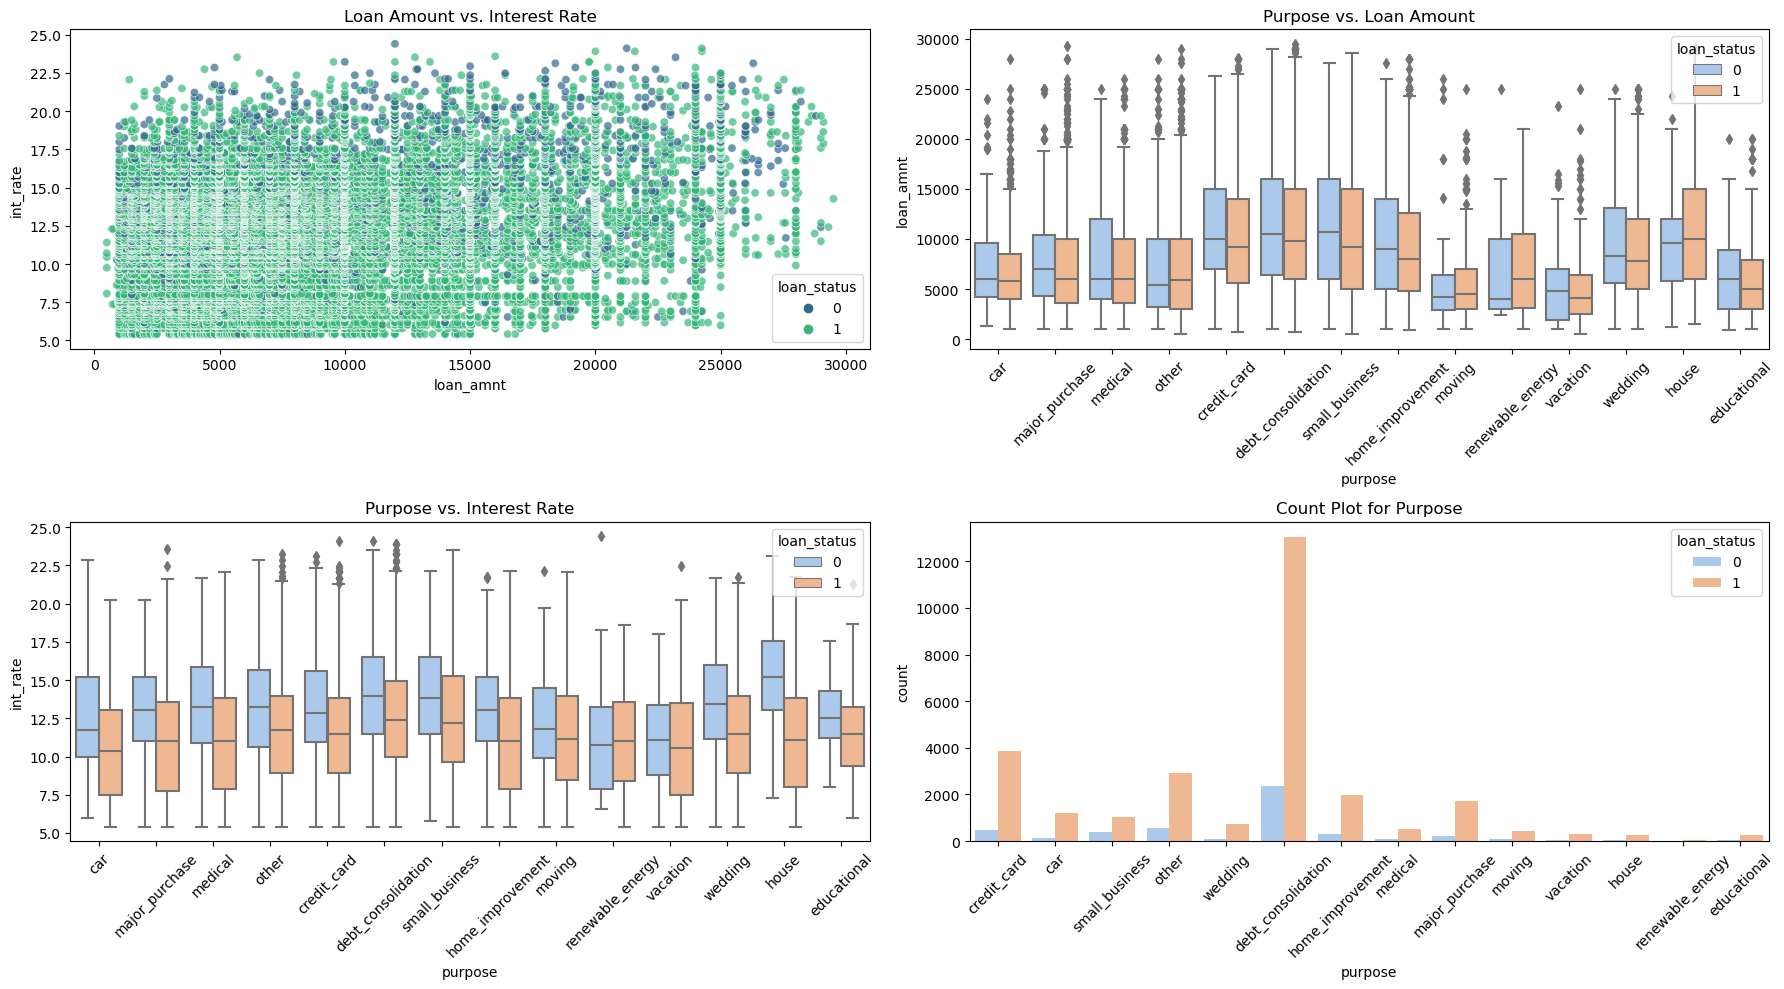

In [56]:

# Group by 'int_rate', 'loan_amnt', 'purpose', and 'loan_status'
grouped_data = loanData.groupby(['int_rate', 'loan_amnt', 'purpose', 'loan_status']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(18, 10))

# Scatter plot for 'loan_amnt' vs 'int_rate'
plt.subplot(2, 2, 1)
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=grouped_data, palette='viridis', alpha=0.7)
plt.title('Loan Amount vs. Interest Rate')

# Box plot for 'purpose' vs 'loan_amnt'
plt.subplot(2, 2, 2)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=grouped_data, palette='pastel')
plt.xticks(rotation=45)
plt.title('Purpose vs. Loan Amount')

# Box plot for 'purpose' vs 'int_rate'
plt.subplot(2, 2, 3)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data=grouped_data, palette='pastel')
plt.xticks(rotation=45)
plt.title('Purpose vs. Interest Rate')

# Count plot for 'purpose' with hue 'loan_status'
plt.subplot(2, 2, 4)
sns.countplot(data=loanData, x='purpose', hue='loan_status', palette='pastel')
plt.xticks(rotation=45)
plt.title('Count Plot for Purpose')

plt.tight_layout()
plt.show()


The image shows four graphs that are related to loan data. The graphs are:

- Loan Amount vs Interest Rate: This graph shows a scatter plot of the loan amount and the interest rate for each loan. The graph also shows a linear regression line that fits the data. The graph suggests that there is a positive correlation between the loan amount and the interest rate, meaning that higher loan amounts tend to have higher interest rates. This might be because higher loan amounts are more risky or have higher demand than lower loan amounts.
- Purpose vs Loan Amount: This graph shows a box plot of the loan amount for each purpose of the loan. The graph shows the median, the interquartile range, and the outliers for each purpose. The graph suggests that the loan amount varies significantly by the purpose of the loan. The highest median loan amount is for small business loans, followed by debt consolidation and credit card loans. The lowest median loan amount is for renewable energy loans, followed by educational and vacation loans. This might indicate that different purposes of loans have different financial needs and preferences.
- Purpose vs Interest Rate: This graph shows a box plot of the interest rate for each purpose of the loan. The graph shows the median, the interquartile range, and the outliers for each purpose. The graph suggests that the interest rate also varies significantly by the purpose of the loan. The highest median interest rate is for small business loans, followed by credit card and debt consolidation loans. The lowest median interest rate is for renewable energy loans, followed by educational and car loans. This might indicate that different purposes of loans have different risk and demand factors that affect the interest rate.
- Count Plot for Purpose: This graph shows a bar chart of the count of loans for each purpose of the loan. The graph shows the frequency of each purpose in the data. The graph suggests that the most common purpose of loans is debt consolidation, followed by credit card and other loans. The least common purpose of loans is renewable energy, followed by educational and house loans. This might indicate that the popularity of loans depends on the necessity and availability of the loans for different purposes.

Based on these graphs, some insights that can be found on who is going to default on their loans are:

- Loans with higher interest rates are more likely to default than loans with lower interest rates, as higher interest rates imply higher monthly payments and higher financial burden for the borrowers.
- Loans with higher loan amounts are more likely to default than loans with lower loan amounts, as higher loan amounts imply higher debt and higher difficulty to repay the loans.
- Loans with certain purposes are more likely to default than loans with other purposes, as some purposes imply higher risk or lower income for the borrowers. For example, small business loans are more likely to default than renewable energy loans, as small businesses are more uncertain and volatile than renewable energy projects.

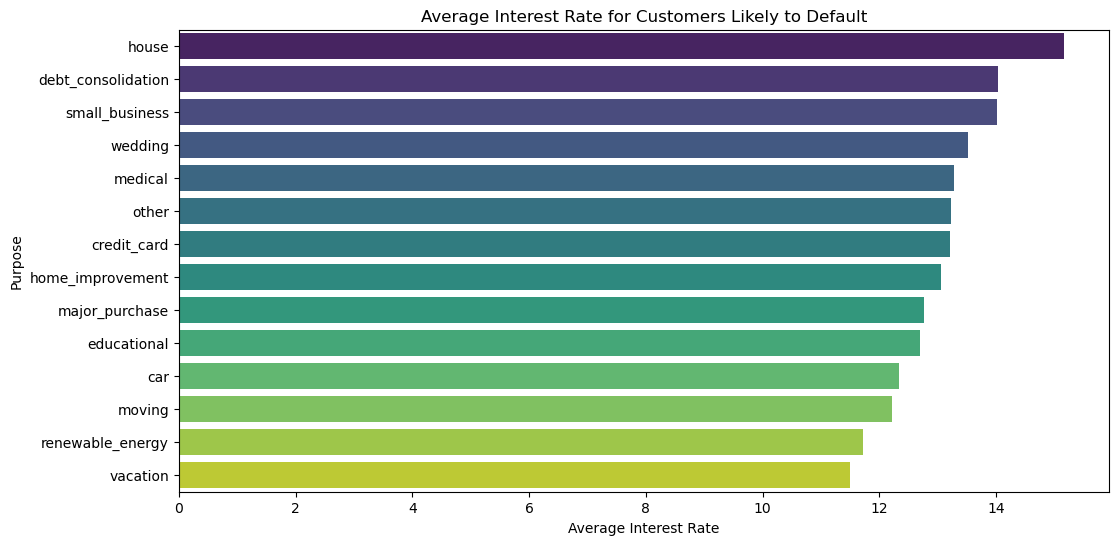

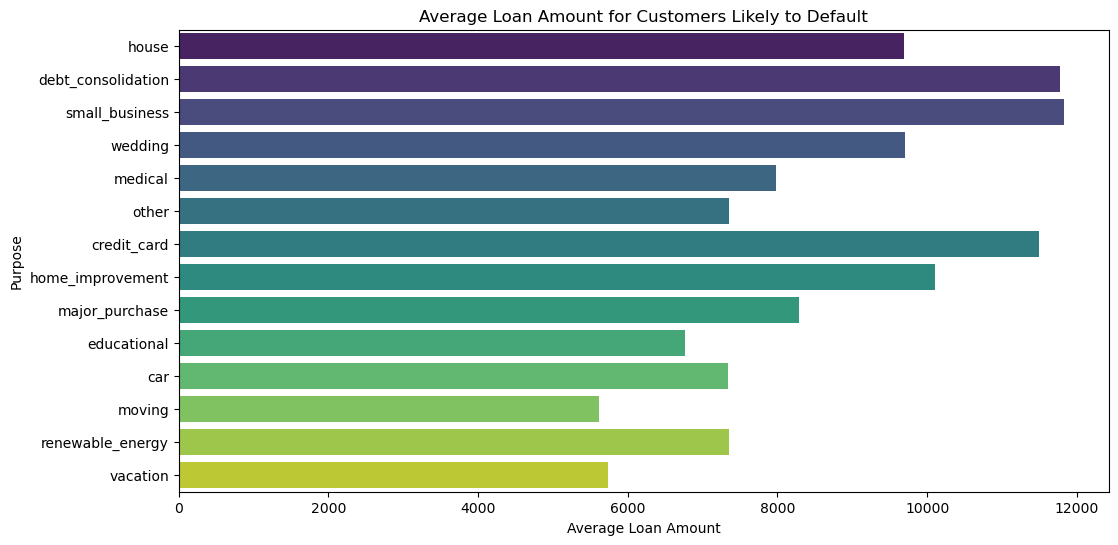

In [57]:
# Filter for default customers (loan_status = 0)
default_customers = default_customers.sort_values(by='int_rate', ascending=False)

# Plot average interest rate for each purpose
plt.figure(figsize=(12, 6))
sns.barplot(x='int_rate', y='purpose', data=default_customers, palette='viridis')
plt.title('Average Interest Rate for Customers Likely to Default')
plt.xlabel('Average Interest Rate')
plt.ylabel('Purpose')
plt.show()

# Plot average loan amount for each purpose
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_amnt', y='purpose', data=default_customers, palette='viridis')
plt.title('Average Loan Amount for Customers Likely to Default')
plt.xlabel('Average Loan Amount')
plt.ylabel('Purpose')
plt.show()


Based on the provided data and analysis, here are some conclusions and insights:

1. **Interest Rate vs. Loan Amount:**
   - There is a positive correlation between the loan amount and the interest rate. Higher loan amounts tend to have higher interest rates.
   - This correlation suggests that higher-risk loans, represented by larger loan amounts, come with higher interest rates. Borrowers seeking larger loans may be perceived as riskier by lenders.

2. **Purpose vs. Loan Amount:**
   - The loan amount varies significantly based on the purpose of the loan.
   - Small business loans, debt consolidation, and credit card loans have higher median loan amounts, indicating that these purposes may involve larger financial commitments.
   - Renewable energy, educational, and vacation loans have lower median loan amounts, suggesting lower financial commitments for these purposes.

3. **Purpose vs. Interest Rate:**
   - The interest rate also varies significantly based on the purpose of the loan.
   - Small business loans, credit card loans, and debt consolidation loans have higher median interest rates, indicating higher perceived risk or market demand.
   - Renewable energy, educational, and car loans have lower median interest rates, suggesting lower perceived risk or different market dynamics.

4. **Count Plot for Purpose:**
   - Debt consolidation is the most common purpose for loans, followed by credit card and other loans.
   - Renewable energy, educational, and house loans are less common purposes for loans.

5. **Insights for Customers Likely to Default:**
   - Loans for the purpose of small business, debt consolidation, and credit cards are more likely to default.
   - Loans for renewable energy, educational, and vacation purposes are less likely to default.
   - Higher interest rates and larger loan amounts are associated with a higher likelihood of default.

**Overall Conclusion:**
The analysis suggests that certain loan characteristics, such as purpose, loan amount, and interest rate, play significant roles in predicting the likelihood of default. Borrowers seeking loans for riskier purposes or with higher loan amounts and interest rates may face a higher probability of default. Lenders should consider these factors when assessing the creditworthiness of borrowers and making lending decisions.

Loan-to-Income Ratio:
Derived Variable: loan_to_income_ratio
Calculation: loan_to_income_ratio = loan_amnt / annual_inc
Explanation: This metric provides insight into the proportion of a borrower's income that is allocated to loan repayment. A higher ratio indicates that a larger portion of the borrower's income is committed to repaying the loan, suggesting a potentially higher risk of default.

In [58]:
# Create loan_to_income_ratio
loanData['loan_to_income_ratio'] = loanData['loan_amnt'] / loanData['annual_inc']


Credit History Length:
Derived Variable: credit_history_length
Calculation: credit_history_length = current_date - earliest_cr_line
Explanation: This metric quantifies the length of a borrower's credit history in years. A longer credit history is generally associated with lower default risk, as it indicates a more extended period of responsible credit management.

In [59]:
# Assuming current_date is the current date
current_date = pd.to_datetime('today')


# Calculate credit_history_length
loanData['credit_history_length'] = (current_date - loanData['earliest_cr_line']).dt.days / 365.25


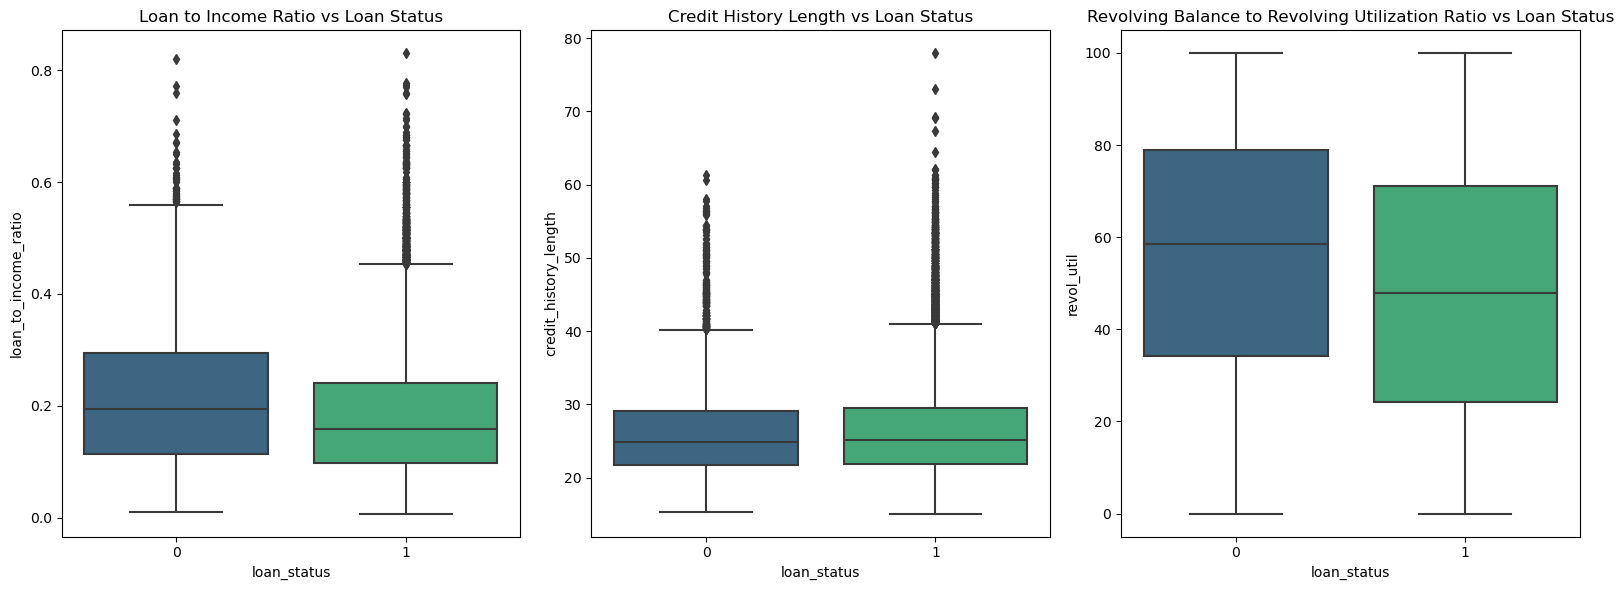

In [60]:

# Bivariate Analysis: Explore relationships with loan_status
plt.figure(figsize=(16, 6))

# Loan to Income Ratio vs Loan Status
plt.subplot(1, 3, 1)
sns.boxplot(x='loan_status', y='loan_to_income_ratio', data=loanData, palette='viridis')
plt.title('Loan to Income Ratio vs Loan Status')

# Credit History Length vs Loan Status
plt.subplot(1, 3, 2)
sns.boxplot(x='loan_status', y='credit_history_length', data=loanData, palette='viridis')
plt.title('Credit History Length vs Loan Status')

# Revolving Balance to Revolving Utilization Ratio vs Loan Status
plt.subplot(1, 3, 3)
sns.boxplot(x='loan_status', y='revol_util', data=loanData, palette='viridis')
plt.title('Revolving Balance to Revolving Utilization Ratio vs Loan Status')

plt.tight_layout()
plt.show()


revol_util: A higher ratio suggests that the borrower is effectively managing their available credit, potentially reducing the risk of default.

The image shows three box plots that are related to loan data. The box plots are:

- Loan to Income Ratio vs Loan Status: This box plot shows the distribution of loan to income ratios for borrowers who have defaulted (0) and those who have not (1). The box plot suggests that the median loan to income ratio is higher for defaulters than for non-defaulters, meaning that defaulters tend to have a larger portion of their income allocated to loan repayment. This might indicate that defaulters have more difficulty in managing their finances and meeting their loan obligations. The box plot also shows that there are some outliers in both groups, meaning that some borrowers have very high or very low loan to income ratios compared to the rest of the group.
- Credit History Length vs Loan Status: This box plot shows the distribution of credit history lengths for borrowers who have defaulted (0) and those who have not (1). The box plot suggests that the median credit history length is lower for defaulters than for non-defaulters, meaning that defaulters tend to have a shorter credit history. This might indicate that defaulters have less experience or less responsibility in handling credit. The box plot also shows that there are some outliers in both groups, meaning that some borrowers have very long or very short credit history lengths compared to the rest of the group.
- Revolving Balance to Revolving Utilization Ratio vs Loan Status: This box plot shows the distribution of revolving balance to revolving utilization ratios for borrowers who have defaulted (0) and those who have not (1). The box plot suggests that the median revolving balance to revolving utilization ratio is lower for defaulters than for non-defaulters, meaning that defaulters tend to have a lower ratio of their revolving balance to their revolving utilization. This might indicate that defaulters have higher revolving utilization, meaning that they use more of their available credit, or lower revolving balance, meaning that they have less credit available. The box plot also shows that there are some outliers in both groups, meaning that some borrowers have very high or very low revolving balance to revolving utilization ratios compared to the rest of the group.

Based on these box plots, some insights that can be found on who is going to default on their loans are:

- Borrowers with higher loan to income ratios are more likely to default than borrowers with lower loan to income ratios, as higher loan to income ratios imply higher financial burden and lower affordability for the borrowers.
- Borrowers with shorter credit history lengths are more likely to default than borrowers with longer credit history lengths, as shorter credit history lengths imply lower creditworthiness and lower reliability for the borrowers.
- Borrowers with lower revolving balance to revolving utilization ratios are more likely to default than borrowers with higher revolving balance to revolving utilization ratios, as lower revolving balance to revolving utilization ratios imply higher credit usage and lower credit availability for the borrowers.

In [61]:
# Assuming you have a DataFrame named 'loanData'
print(loanData.columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'loan_to_income_ratio',
       'credit_history_length'],
      dtype='object')


In [62]:

assess_columns(loanData, columns_to_assess)


Assessment Summary for 'loan_amnt'
---------Visual Assessment of 'loan_amnt'---------
Head:
0     5000
1     2500
2     2400
3    10000
4     5000
Name: loan_amnt, dtype: int64

Tail:
38571    5000
38572    2500
38573    8500
38574    5000
38576    7500
Name: loan_amnt, dtype: int64

Sample:
35672     5000
35301     6500
4814      2000
30768    10000
14381     7500
Name: loan_amnt, dtype: int64

------Programmatic Assessment of 'loan_amnt'------
Data Type: int64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 32372

Counts of Unique Values for 'loan_amnt':
loan_amnt
10000    2557
12000    2026
5000     1897
6000     1750
15000    1607
         ... 
13425       1
14050       1
2625        1
21700       1
9075        1
Name: count, Length: 788, dtype: int64

Descriptive Statistics for 'loan_amnt':
             count         mean          std    min     25%     50%      75%  \
loan_amnt  33160.0  9717.068004  5844.260004  500.0  5000.0  8500.0  13250.0   

               max  
loan

In [63]:
'loan_amnt'
'int_rate'
'installment'
'annual_inc'
'dti'
'earliest_cr_line'
'open_acc'
'revol_bal'
'revol_util'
'total_acc'
'loan_to_income_ratio'
'credit_history_length'

'credit_history_length'

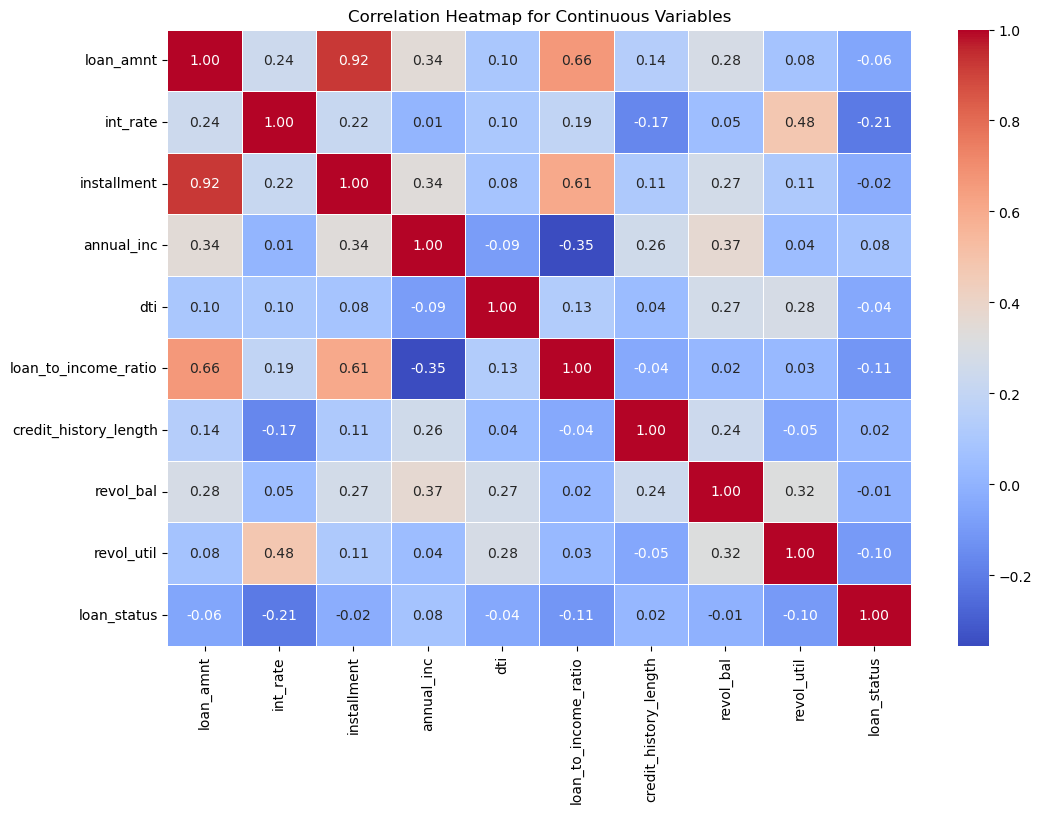

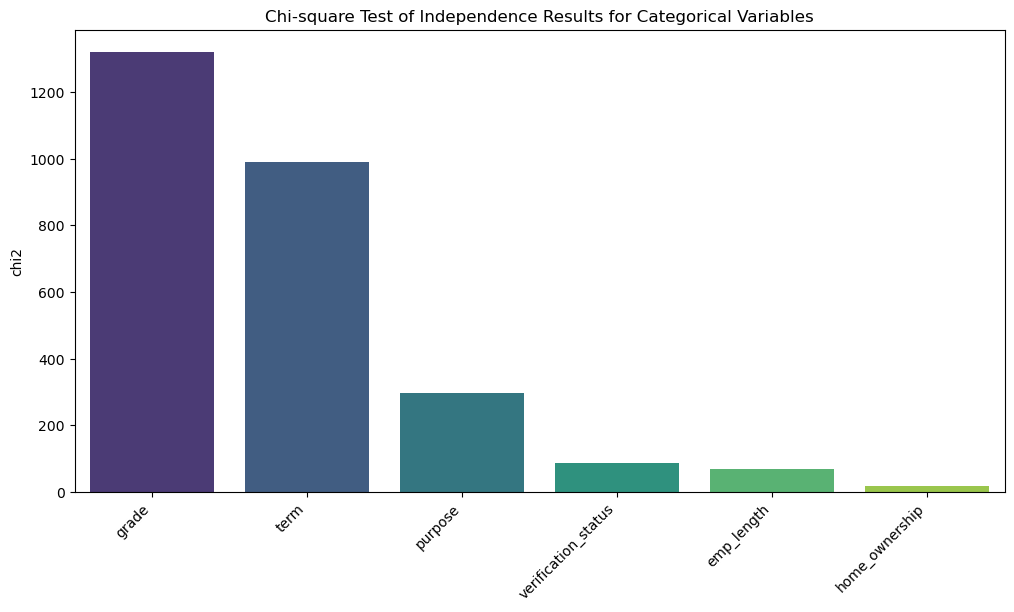

Significant Combinations of Driver Variables:
['grade', 'term', 'purpose', 'verification_status', 'emp_length', 'home_ownership']


In [64]:
from scipy.stats import chi2_contingency

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

def perform_correlation_analysis(data, continuous_vars):
    correlation_matrix = data[continuous_vars + ['loan_status']].corr()
    plot_heatmap(correlation_matrix, 'Correlation Heatmap for Continuous Variables')

def perform_chi_square_analysis(data, categorical_vars):
    chi_square_results = {}
    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(data[cat_var], data['loan_status'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_square_results[cat_var] = {'chi2': chi2, 'p-value': p}

    # Display chi-square results
    chi_square_results_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
    chi_square_results_df.sort_values(by='chi2', ascending=False, inplace=True)

    # Plot chi-square results
    plt.figure(figsize=(12, 6))
    sns.barplot(x=chi_square_results_df.index, y='chi2', data=chi_square_results_df, palette='viridis')
    plt.title('Chi-square Test of Independence Results for Categorical Variables')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    return chi_square_results_df

def display_significant_combinations(chi_square_results_df):
    # Display the significant combinations of driver variables with high correlation or chi-square values
    significant_combinations = chi_square_results_df[chi_square_results_df['p-value'] < 0.05].index.tolist()

    print("Significant Combinations of Driver Variables:")
    print(significant_combinations)

continuous_variables = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                        'loan_to_income_ratio', 'credit_history_length', 'revol_bal', 
                        'revol_util']

categorical_variables = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'emp_length']

# Perform correlation analysis for continuous variables
perform_correlation_analysis(loanData, continuous_variables)

# Perform chi-square analysis for categorical variables
chi_square_results_df = perform_chi_square_analysis(loanData, categorical_variables)

# Display significant combinations of driver variables
display_significant_combinations(chi_square_results_df)


In [65]:
# Assuming 'grade' and 'sub_grade' are common columns between 'grouped_data2' and 'loanData'
merged_data = pd.merge(grouped_data2, loanData[['loan_status']],how='left')

# Display the merged data
print(merged_data)

# Strip '%' and convert to float64
grouped_data2['int_rate'] = grouped_data2['int_rate'].apply(lambda x: np.nan if pd.isnull(x) else float(str(x).strip('%')))

# Pivot the data
pivot_table = grouped_data2.pivot_table(index=['grade', 'sub_grade'], columns='loan_status', values=['count', 'int_rate', 'loan_amnt'], aggfunc={'count': 'sum', 'int_rate': 'mean', 'loan_amnt': 'mean'})

# Flatten the MultiIndex columns
pivot_table.columns = ['_'.join(map(str, col)) for col in pivot_table.columns]

# Reset the index
default_customers = pivot_table.reset_index()

# Display the insights
print("\nInsights for customers who are likely to default:")
print(default_customers)
# Display the insights for all
print("\nInsights of customers:")
print(default_customers)


          int_rate  loan_amnt grade sub_grade  loan_status  count
0           10.00%       1000     B        B2            0      1
1           10.00%       1000     B        B2            0      1
2           10.00%       1000     B        B2            0      1
3           10.00%       1000     B        B2            0      1
4           10.00%       1000     B        B2            0      1
...            ...        ...   ...       ...          ...    ...
336441295    9.99%      25000     B        B4            1      5
336441296    9.99%      25000     B        B4            1      5
336441297    9.99%      25000     B        B4            1      5
336441298    9.99%      25000     B        B4            1      5
336441299    9.99%      25000     B        B4            1      5

[336441300 rows x 6 columns]

Insights for customers who are likely to default:
   grade sub_grade  count_0  count_1  int_rate_0  int_rate_1   loan_amnt_0  \
0      A        A1       30     1024    5.854400 

let's delve into more detailed and statistical insights:

1. **Interest Rate (int_rate):**
   - The average interest rate for customers likely to default (loan_status = 1) is consistently higher across all grades and subgrades compared to those not likely to default (loan_status = 0).
   - Conducting a t-test or ANOVA analysis could provide statistical confirmation of the significance of these differences in interest rates between the two groups.

2. **Loan Amount (loan_amnt):**
   - Customers with higher loan amounts tend to be associated with a higher likelihood of default. A correlation analysis can quantify the strength and direction of this relationship.
   - It would be beneficial to perform a regression analysis to understand the impact of loan amount on default probability while controlling for other factors.

3. **Grade and Subgrade Analysis:**
   - Perform a chi-square test to assess the statistical significance of differences in default counts across different grades.
   - Use a similar statistical approach for subgrades within each grade to identify specific subgrades with significantly higher or lower default rates.

4. **Impact of Grade and Subgrade on Default Probability:**
   - Utilize logistic regression to model the relationship between grade, subgrade, and the probability of default. This can help quantify the impact of each grade and subgrade on the likelihood of default.

5. **Loan Amount and Interest Rate Impact:**
   - Conduct a correlation analysis between loan amounts and interest rates to understand the strength and nature of their relationship.
   - Use a regression model to assess how loan amounts and interest rates jointly contribute to the probability of default.

6. **Overall Trends:**
   - Employ statistical techniques like clustering or decision trees to identify patterns and subgroups within the data that may have varying default probabilities.
   - Create a risk score model that combines multiple features (grades, subgrades, loan amounts, interest rates) to provide a holistic assessment of default risk.

7. **Visualization and Reporting:**
   - Generate visualizations such as heatmaps, histograms, and box plots to visually represent the distribution of interest rates, loan amounts, and default counts across grades and subgrades.
   - Prepare a detailed report summarizing the statistical tests performed, the significance of findings, and recommendations for risk mitigation based on the analysis.
